In [1]:
# Description: This use the Bollinger Band strategy to determine when to buy and sell stock.

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import pandas_datareader.data as web

inox_df = web.get_data_yahoo('INOXLEISUR.NS', '2016-02-01', '2017-12-29')

print(inox_df.head())

print(inox_df.shape)

                  High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2016-02-01  222.100006  217.500000  217.850006  219.449997   45347  218.876495
2016-02-02  224.899994  212.550003  220.600006  215.000000  356126  214.438126
2016-02-03  218.100006  212.000000  212.050003  215.399994  175794  214.837082
2016-02-04  217.800003  210.050003  216.500000  211.649994   74910  211.096878
2016-02-05  215.699997  205.600006  212.000000  206.699997  106378  206.159821
(474, 6)


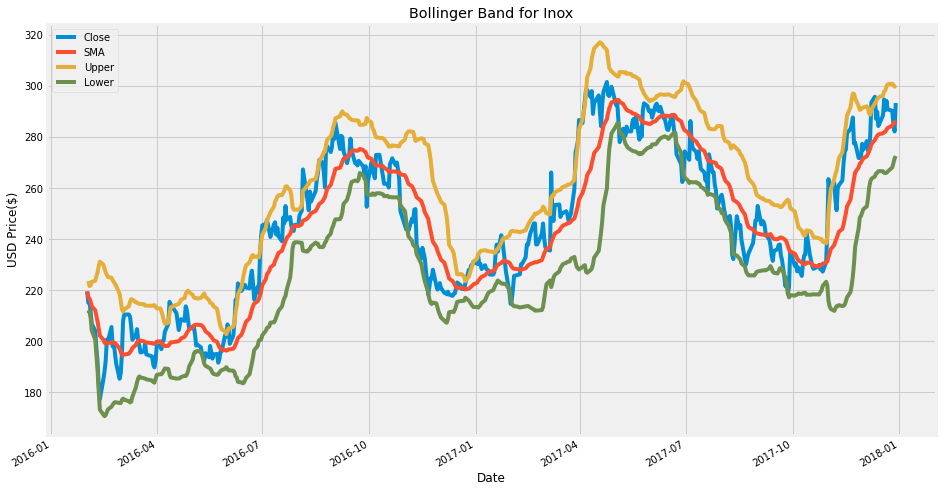

In [3]:
# Calcuate the simple moving average, standard deviation, lower band, upper band...
# Get the time period (20 day)
period = 20

# Calculate the Simple Moving Average.(SMA)
inox_df['SMA'] = inox_df['Close'].rolling(window=period, min_periods=1).mean()

# Get the standard deviation
inox_df['STD'] = inox_df['Close'].rolling(window=period, min_periods=1).std()

# Calculate the upper Bollinger band
inox_df['Upper'] = inox_df['SMA'] + (inox_df['STD'] * 2)

# Calculate the lower Bollinger band
inox_df['Lower'] = inox_df['SMA'] - (inox_df['STD'] * 2)

# Create a list of columns to keep
columns_list = ['Close', 'SMA', 'Upper', 'Lower']

# plot the data
inox_df[columns_list].plot(figsize=(14.2, 8.4))
plt.title('Bollinger Band for Inox')
plt.ylabel('USD Price($)')
plt.show()

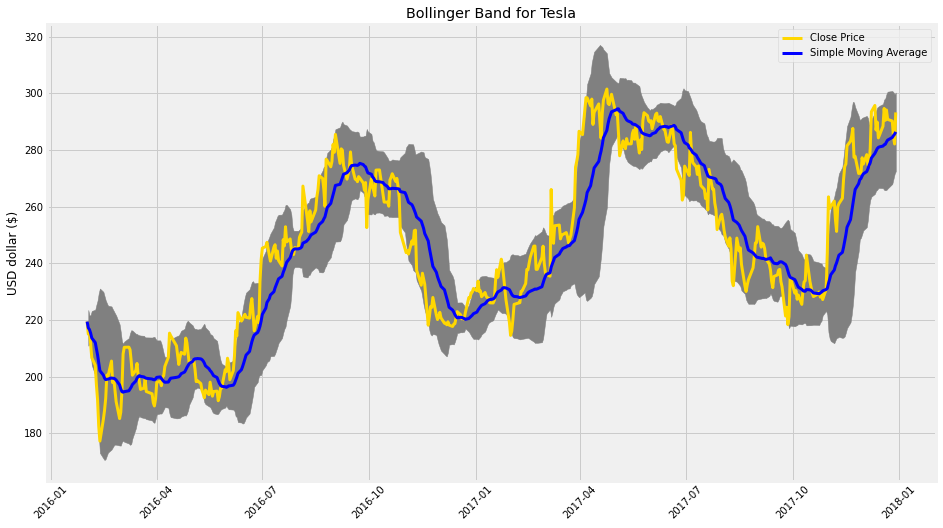

In [4]:
# plot and shade the area between the two Boillinger bands
# Get the figure and figure size.
fig = plt.figure(figsize=(14.2, 8.4))

# Add the subplot
ax = fig.add_subplot(1, 1, 1)

# Get the index values of the data frame
x_axis = inox_df.index

# Plot and shade the area between the upper and lower band grey
ax.fill_between(x_axis, inox_df['Upper'], inox_df['Lower'], color = 'grey')
ax.plot(x_axis, inox_df['Close'], color = 'gold', lw=3, label='Close Price')
ax.plot(x_axis, inox_df['SMA'], color='blue', lw=3, label='Simple Moving Average')

# Set the title and show the image
ax.set_title('Bollinger Band for Tesla')
ax.set_ylabel('USD dollar ($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [5]:
# Create a new data frame
inox_df_new = inox_df[period-1:]

# Show the new data
inox_df_new

,High,Low,Open,Close,Volume,Adj Close,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2016-02-26,199.449997,188.000000,192.149994,191.199997,50596,190.700317,198.784999,11.405827,221.596653,175.973345
2016-02-29,196.000000,183.500000,196.000000,185.199997,46868,184.716003,197.072499,10.688464,218.449427,175.695571
2016-03-01,193.199997,186.000000,186.000000,187.449997,65962,186.960129,195.694999,10.010177,215.715352,175.674646
2016-03-02,197.500000,188.199997,189.899994,195.350006,65485,194.839478,194.692500,8.872195,212.436890,176.948109
2016-03-03,209.399994,194.000000,196.000000,208.000000,211102,207.456421,194.510000,8.536201,211.582403,177.437597
...,...,...,...,...,...,...,...,...,...,...
2017-12-22,303.799988,288.000000,297.399994,290.799988,196295,290.040009,283.477501,8.546629,300.570758,266.384244
2017-12-26,293.100006,289.950012,291.299988,290.200012,40107,289.441620,284.402501,8.198918,300.800336,268.004666
2017-12-27,292.200012,283.149994,289.049988,284.850006,56014,284.105591,285.050002,7.652744,300.355489,269.744514


In [6]:
# Create the function to get the buy and sell signals
def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
    if data['Close'][i] > data['Upper'][i]: # Then you should sell 
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['Close'][i] < data['Lower'][i]: # Then you should buy
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)

  return (buy_signal, sell_signal)

In [7]:
# Create two new colunms 
inox_df_new['Buy'] = get_signal(inox_df_new)[0]
inox_df_new['Sell'] = get_signal(inox_df_new)[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


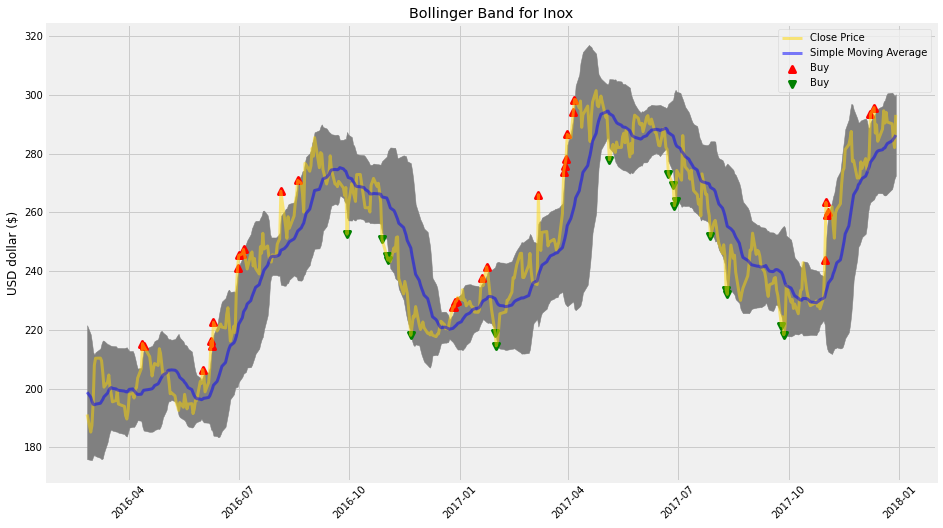

In [8]:
# plot and shade the area between the two Boillinger bands
# Get the figure and figure size.
fig = plt.figure(figsize=(14.2, 8.4))

# Add the subplot
ax = fig.add_subplot(1, 1, 1)

# Get the index values of the data frame
x_axis = inox_df_new.index

# Plot and shade the area between the upper and lower band grey
ax.fill_between(x_axis, inox_df_new['Upper'], inox_df_new['Lower'], color = 'grey')
ax.plot(x_axis, inox_df_new['Close'], color = 'gold', lw=3, label='Close Price', alpha=0.5)
ax.plot(x_axis, inox_df_new['SMA'], color='blue', lw=3, label='Simple Moving Average', alpha=0.5)
ax.scatter(x_axis, inox_df_new['Sell'], color='red', lw=3, label='Buy', marker='^')
ax.scatter(x_axis, inox_df_new['Buy'], color='green', lw=3, label='Buy', marker='v')

# Set the title and show the image
ax.set_title('Bollinger Band for Inox')
ax.set_ylabel('USD dollar ($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()